# Code for Q1


x0:= 0, x1:= (1+0.5j), x2:= (2+1j), Iteration: 1, Relative error: 15.179844482005121, newx: (0.12397220810947185-0.06979438780981773j)
x0:= (1+0.5j), x1:= (2+1j), x2:= (0.12397220810947185-0.06979438780981773j), Iteration: 2, Relative error: 0.5455766711662452, newx: (0.13726696187006776-0.202683463482988j)
x0:= (2+1j), x1:= (0.12397220810947185-0.06979438780981773j), x2:= (0.13726696187006776-0.202683463482988j), Iteration: 3, Relative error: 0.7550225405822998, newx: (-0.07904123195511922-0.3097260833136055j)
x0:= (0.12397220810947185-0.06979438780981773j), x1:= (0.13726696187006776-0.202683463482988j), x2:= (-0.07904123195511922-0.3097260833136055j), Iteration: 4, Relative error: 1.665773449232537, newx: (-0.06466538273146699-0.1049234998957716j)
x0:= (0.13726696187006776-0.202683463482988j), x1:= (-0.07904123195511922-0.3097260833136055j), x2:= (-0.06466538273146699-0.1049234998957716j), Iteration: 5, Relative error: 0.05107503685791541, newx: (-0.06988070905544216-0.10898876313718

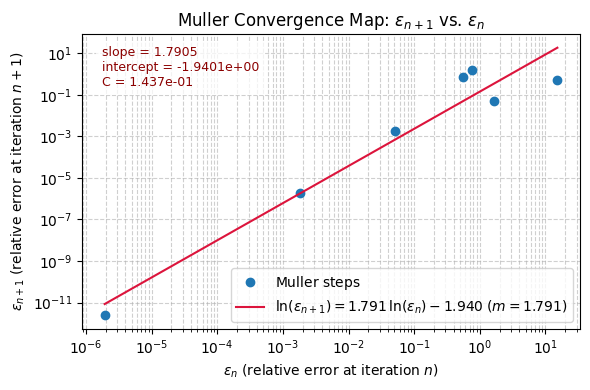

Slope (m) = 1.790530
log form: ln(err_(n+1)) = 1.790530 * ln(err_n) + -1.940089
power form: err_(n+1) = 1.436912e-01 * err_n^1.790530


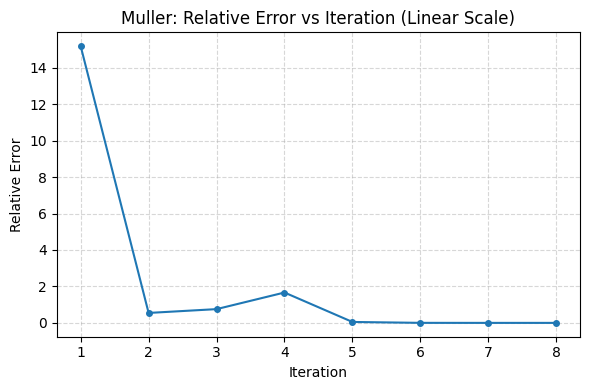

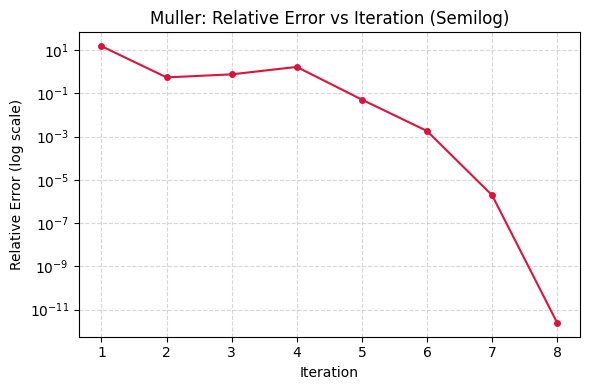

In [2]:
#First, create the function of freq.
import cmath
import matplotlib.pyplot as plt
import numpy as np #For drawing the reference line
error = 10**(-6)
def fn(x: complex) -> complex:
    return x**3+(2-0.5j)*x**2+(1.5+1j)*x+0.2*1j
x0 = 0
x1 = 1 + 0.5j
x2 = 2 + 1j
#Doing Muller's method:
k = 0
rel_err_list = []
while k<500:
    k+=1
    f0 = fn(x0)
    f1 = fn(x1)
    f2 = fn(x2)
    a = ((x1-x2)*(f0-f2) - (x0-x2)*(f1-f2))/((x0-x2)*(x1-x2)*(x0-x1))
    b = ((x0-x2)*(x0-x2)*(f1-f2) - (x1-x2)*(x1-x2)*(f0-f2))/((x0-x2)*(x1-x2)*(x0-x1))
    c = f2  
    disc = cmath.sqrt(b*b - 4*a*c)
    d1 = b + disc
    d2 = b - disc
    denom = d1 if b.real>=0 else d2
    x = x2 - 2*c/denom
    relerr = abs((x - x2))/abs(x)
    rel_err_list.append(relerr)
    if denom == 0:
        print("Not possible to continue")
        break
    print(f"x0:= {x0}, x1:= {x1}, x2:= {x2}, Iteration: {k}, Relative error: {relerr}, newx: {x}")
    x0 = x1
    x1 = x2
    x2 = x
    if relerr < error:
        print(f"Relative err:={relerr}, converged in {k} iter, final value = {x}")
        break

# --- FIXES & CLEAN VERSION OF CONVERGENCE MAP SECTION ---
# Common causes of a Pylance formatting warning for {slope:.3f} here:
# 1. Variable 'slope' not defined (code above failed before polyfit).
# 2. Broken/mismatched quotes when constructing the legend_label string.
# 3. Previous cell execution order (stale state).
# 4. The earlier bug: `denom = d1 if abs(d1)>abs(d2) else denom == d2`
#    (should be `d2`; the old line creates a boolean which may cascade errors).

# Ensure earlier in the Muller loop you corrected:
# denom = d1 if abs(d1) > abs(d2) else d2

import numpy as np
import matplotlib.pyplot as plt

if len(rel_err_list) >= 2:
    x_vals = np.array(rel_err_list[:-1])
    y_vals = np.array(rel_err_list[1:])
    mask = (x_vals > 0) & (y_vals > 0)
    x_fit = x_vals[mask]; y_fit = y_vals[mask]

    if len(x_fit) >= 2:
        logx = np.log(x_fit)
        logy = np.log(y_fit)
        slope, intercept = np.polyfit(logx, logy, 1)
        C = np.exp(intercept)
        annot = (f"slope = {slope:.4f}\n"
                 f"intercept = {intercept:.4e}\n"
                 f"C = {C:.3e}")

        xs_line = np.logspace(np.log10(x_fit.min()), np.log10(x_fit.max()), 200)
        ys_line = C * xs_line**slope

        plt.rcParams.update({
            "text.usetex": False,
            "font.size": 10
        })

        plt.figure(figsize=(6,4))
        plt.loglog(x_vals, y_vals, 'o', label=r"$\text{Muller steps}$")

        # Single well-formed raw f-string (rf) for mathtext
        legend_label = rf"$\ln(\varepsilon_{{n+1}})= {slope:.3f}\,\ln(\varepsilon_n){intercept:.3f}\;(m={slope:.3f})$"
        plt.loglog(xs_line, ys_line, '-', color='crimson', label=legend_label)

        plt.xlabel(r"$\varepsilon_n$ (relative error at iteration $n$)")
        plt.ylabel(r"$\varepsilon_{n+1}$ (relative error at iteration $n+1$)")
        plt.title(r"Muller Convergence Map: $\varepsilon_{n+1}$ vs. $\varepsilon_n$")
        plt.grid(True, which='both', ls='--', alpha=0.6)
        plt.legend(loc='lower right')
        plt.text(0.04, 0.96, annot,
                 transform=plt.gca().transAxes,
                 va='top', ha='left',
                 fontsize=9, color='darkred',
                 bbox=dict(facecolor='white', alpha=0.75, edgecolor='none'))

        plt.tight_layout()
        plt.show()

        print(f"Slope (m) = {slope:.6f}")
        print(f"log form: ln(err_(n+1)) = {slope:.6f} * ln(err_n) + {intercept:.6f}")
        print(f"power form: err_(n+1) = {C:.6e} * err_n^{slope:.6f}")
    else:
        print("Not enough positive error points for log-log fit.")
else:
    print("Not enough points to plot convergence map (need >=2 errors).")
# --- END FIXED SECTION ---


# ...existing code above (after Muller loop and convergence map section)...

# Define iteration index array for plotting
if rel_err_list:
    iters = np.arange(1, len(rel_err_list)+1)

    # Linear y-scale
    plt.figure(figsize=(6,4))
    plt.plot(iters, rel_err_list, 'o-', ms=4)
    plt.xlabel('Iteration')
    plt.ylabel('Relative Error')
    plt.title("Muller: Relative Error vs Iteration (Linear Scale)")
    plt.grid(alpha=0.5, ls='--')
    plt.tight_layout()
    plt.show()

    # Semilog (better to see convergence rate)
    plt.figure(figsize=(6,4))
    plt.semilogy(iters, rel_err_list, 'o-', ms=4, color='crimson')
    plt.xlabel('Iteration')
    plt.ylabel('Relative Error (log scale)')
    plt.title("Muller: Relative Error vs Iteration (Semilog)")
    plt.grid(alpha=0.5, ls='--', which='both')
    plt.tight_layout()
    plt.show()
else:
    print("No relative error data collected; cannot plot.")
# ...existing code...


In [4]:
# Comments:
# Muller works for complex roots without derivative.
# Newton also works here (polynomial, smooth). Needs good initial guess; may converge to a different root if started elsewhere.
x_value = 0
j = 0
maxiter = 500
epsilon = 10**-6
# Reuse fn (already defined above):
def fn_prime(x: complex) -> complex:
    """
    Derivative of fn:
    f'(x) = 3x^2 + 2(2 - 0.5j)x + (1.5 + 1j)
    """
    return 3*x**2 + 2*(2 - 0.5j)*x + (1.5 + 1j)

#Newton's
import matplotlib.pyplot as plt
error_list = []
iteration_list = []
while j < maxiter:
    j+=1
    func_val = fn(x_value)
    diffy = fn_prime(x_value)
    if diffy == 0:
        print("Derivative is zero, can't continue")
        break
    newpoint = x_value - func_val/diffy
    if newpoint == 0:
        break
    error = abs((newpoint-x_value)/newpoint)
    error_list.append(error)
    iteration_list.append(j)
    if error < epsilon:
        print(f"Target hit! Value is {newpoint}, on iteration {j} and error is {error}")
        break
    x_value = newpoint
    print(f"Iteration:{j}, Value:{x_value}, Error:{error}")

Iteration:1, Value:(-0.06153846153846154-0.09230769230769231j), Error:1.0
Iteration:2, Value:(-0.06979555232939583-0.10871848056038554j), Error:0.14219682068116296
Iteration:3, Value:(-0.06996473700827538-0.10920800524928413j), Error:0.003993415416567945
Iteration:4, Value:(-0.06996477174990744-0.1092084157794641j), Error:3.1765939065172105e-06
Target hit! Value is (-0.0699647717498031-0.10920841577970299j), on iteration 5 and error is 2.00991403511003e-12
